In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import pickle 
from matplotlib import pyplot as plt

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Techprocess Alternate")

In [3]:
df = pd.read_pickle(os.getcwd()+"\scored_clx_skp_client.pkl")

In [4]:
TIME_DECISION_DATE = "TIME_DECISION_DATE"
FINAL_SCORE = "XGB_SCORE"
RISK_SCORE = "RISK_SCORE"
COMBINED_SCORE = "COMBINED_SCORE"
TARGET = "RISK_FSTQPD30"
# PREDICTOR_LIST = ['G_RISK_FSTQPD30_SCORE', 'G_RISK_FPD10_SCORE','G_DEFAULT_FLAG_CHANGE_1']
df["MONTH"] = df[TIME_DECISION_DATE].dt.strftime("%y-%m")

In [5]:
df = df[df["TIME_DECISION_DATE"]<= pd.datetime(2019,11,30)]

In [6]:
df.head()

,SKP_CREDIT_CASE,TIME_DECISION_DATE,RISK_AGRF180,RISK_FPD30,RISK_FSPD30,RISK_FSTPD30,RISK_FSTQPD30,RISK_FSTQPD60,PRODUCT_GROUP,NTC_FLAG,...,PROCESS ISSUE_REASON_5_ENCODED,WILLFULL DEFAULTS_REASON_5_ENCODED,DEBITED_REASON_6_ENCODED,Others_REASON_6_ENCODED,PROCESS ISSUE_REASON_6_ENCODED,WILLFULL DEFAULTS_REASON_6_ENCODED,XGB_SCORE,RISK_SCORE_LOG,XGB_SCORE_LOG,COMBINED_SCORE
4202,285458814,2019-11-30,1,0,0,0,0,0,CL,Others,...,0,0,1,0,0,0,0.475441,-4.064528,-0.098314,0.080460
4203,285458788,2019-11-30,1,0,0,0,0,0,CL,Others,...,0,0,1,0,0,0,0.468542,-4.149410,-0.125997,0.071071
4205,285455566,2019-11-30,1,0,1,1,1,1,CL,Others,...,0,0,0,1,0,0,0.486358,-3.947106,-0.054580,0.096347
4207,285454940,2019-11-30,1,0,0,0,0,0,CL,Others,...,0,0,1,0,0,0,0.473710,-5.646186,-0.105257,0.021392
4209,285454144,2019-11-30,1,0,0,0,0,0,CL,Others,...,0,0,1,0,0,0,0.473804,-4.053358,-0.104881,0.080114


# GINI

### Gini Chart

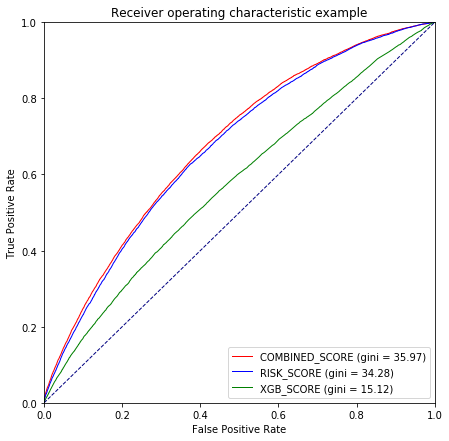

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(1, 1, 1)

lw = 1
fpr, tpr, thresholds = roc_curve(df[TARGET],df[COMBINED_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='red', lw=lw, label='COMBINED_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[RISK_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='blue', lw=lw, label='RISK_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[FINAL_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='green', lw=lw, label='XGB_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### MOM GINI

In [8]:
gini_dic = {}
for x in df["MONTH"].unique():
    try:
        if "MONTH" not in gini_dic:
            gini_dic["MONTH"] = []
        if FINAL_SCORE not in gini_dic: 
            gini_dic[FINAL_SCORE] = []
        if RISK_SCORE not in gini_dic: 
            gini_dic[RISK_SCORE] = []
        if COMBINED_SCORE not in gini_dic: 
            gini_dic[COMBINED_SCORE] = []
        
        gini_dic[FINAL_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][FINAL_SCORE])-1)*100)
        gini_dic[RISK_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][RISK_SCORE])-1)*100)
        gini_dic[COMBINED_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][COMBINED_SCORE])-1)*100)
        gini_dic["MONTH"].append(x)
#         for y in PREDICTOR_LIST:
#             if y not in gini_dic:
#                   gini_dic[y] = []
#             gini_dic[y].append(((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][y])-1)*100))
    except: 
        print("ERROR")

gini_df = pd.DataFrame(gini_dic)
gini_df.sort_values(by = "MONTH",inplace = True)
gini_df.reset_index(inplace = True)


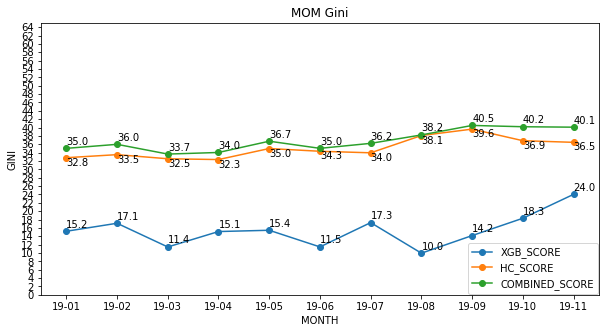

In [9]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gini_df["MONTH"],gini_df["XGB_SCORE"], marker='o', scaley = False, label = "XGB_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["RISK_SCORE"], marker='o', scaley = False, label = "HC_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE"], marker='o', scaley = False, label= "COMBINED_SCORE")

for i, txt in enumerate(gini_df["XGB_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["XGB_SCORE"][i]+0.9))
for i, txt in enumerate(gini_df["RISK_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["RISK_SCORE"][i]-1.9))
for i, txt in enumerate(gini_df["COMBINED_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE"][i]+0.9))

plt.legend(loc='lower right', borderaxespad=0.1)
plt.ylim(0,65)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,65,2))
ax1.set_title("MOM Gini")
plt.show()

# Lifts and Gains Chart

In [9]:
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))


In [10]:
def lift_and_gain_df(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['min_prob'] = grouped.min()[prob]
    liftstable['max_prob'] = grouped.max()[prob]
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()[target])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['%base'] = (liftstable.total / data[target].count())
    liftstable = liftstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    liftstable['cum%_base'] = (liftstable.total / data[target].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data[target].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data[target].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()

    
    liftstable['lift'] = np.round(liftstable['%bads']/liftstable['%base'] , 3)
    liftstable['cum_lift'] = np.round(liftstable['cum%_bads']/liftstable['cum%_base'] , 3)

    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)

    liftstable.index = range(1,11)
    liftstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 13)
    return(liftstable)

In [11]:
#cum%_bads is gain_score
combined_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=COMBINED_SCORE)
risk_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=RISK_SCORE)
final_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=FINAL_SCORE)

### Cumulative Lift Chart 

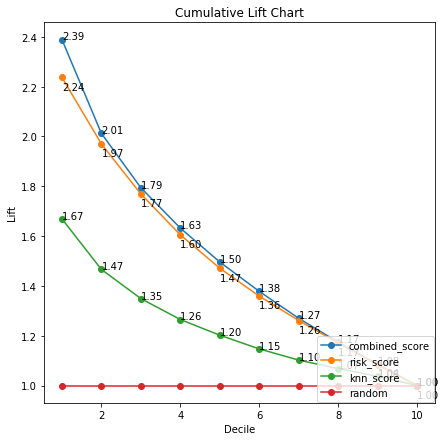

In [12]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,combined_score_lift["cum_lift"], label = 'combined_score', marker='o')
for i, txt in enumerate(combined_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (combined_score_lift.index[i], combined_score_lift["cum_lift"][i+1]))

ax1.plot(combined_score_lift.index,risk_score_lift["cum_lift"], label = 'risk_score', marker='o')
for i, txt in enumerate(risk_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], risk_score_lift["cum_lift"][i+1]-0.05))

ax1.plot(combined_score_lift.index,final_score_lift["cum_lift"], label = 'knn_score', marker='o')
for i, txt in enumerate(final_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], final_score_lift["cum_lift"][i+1]))

ax1.plot(np.arange(1,11,1),[1,1,1,1,1,1,1,1,1,1], label = 'random', marker='o')

plt.legend(loc='lower right', borderaxespad=0.1)
plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Cumulative Lift Chart")
plt.show()    


## Gains Chart

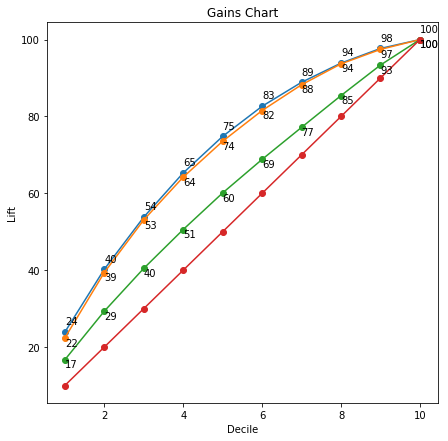

In [13]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]], label = 'combined_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (combined_score_lift.index[i], [float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]][i]+2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]], label = 'risk_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]][i]-2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in final_score_lift["cum%_bads"]], label = 'knn_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in final_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in final_score_lift["cum%_bads"]][i]-2))

ax1.plot(np.arange(1,11,1),np.arange(10,101,10), label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Gains Chart")
plt.show()    


# Kolomogorov Smirnov chart

In [14]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob]+jitter(data[prob]), 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['bads']   = grouped.sum()[target]
    kstable['goods'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['%bads'] = (kstable.bads / data[target].sum()).apply('{0:.2%}'.format)
    kstable['%goods'] = (kstable.goods / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum%_bads']=(kstable.bads / data[target].sum()).cumsum()
    kstable['cum%_goods']=(kstable.goods / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum%_bads']-kstable['cum%_goods'], 3) * 100

    #Formating
    kstable['cum%_bads']= kstable['cum%_bads'].apply('{0:.2%}'.format)
    kstable['cum%_goods']= kstable['cum%_goods'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

KS is 26.200000000000003% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.065651,0.622785,2542,28424,23.89%,9.51%,23.89%,9.51%,14.4
2,0.050556,0.065651,1740,29226,16.35%,9.77%,40.24%,19.28%,21.0
3,0.041478,0.050556,1444,29522,13.57%,9.87%,53.81%,29.15%,24.7
4,0.034711,0.041478,1223,29743,11.49%,9.95%,65.30%,39.10%,26.2
5,0.029183,0.034710,1013,29952,9.52%,10.02%,74.82%,49.12%,25.7
6,0.024419,0.029183,834,30132,7.84%,10.08%,82.65%,59.19%,23.5
7,0.020119,0.024419,664,30302,6.24%,10.13%,88.89%,69.33%,19.6
8,0.015961,0.020118,531,30435,4.99%,10.18%,93.88%,79.51%,14.4
9,0.011594,0.015960,405,30561,3.81%,10.22%,97.69%,89.73%,8.0


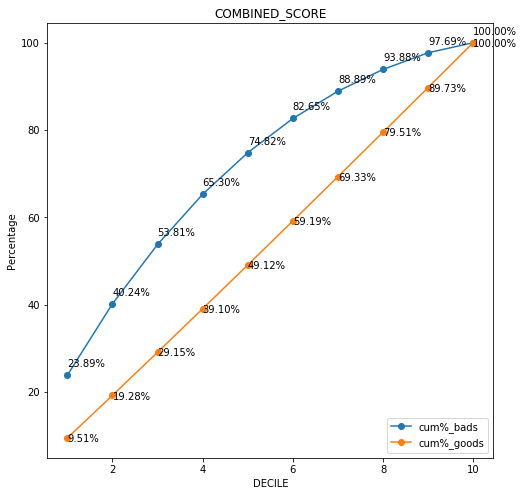

In [15]:
ks_df=ks(data=df,target=TARGET, prob=COMBINED_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("COMBINED_SCORE")
    
ks_df

KS is 25.1% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.011625,0.273232,2381,28585,22.37%,9.56%,22.37%,9.56%,12.8
2,0.008966,0.011625,1811,29155,17.02%,9.75%,39.39%,19.31%,20.1
3,0.007258,0.008965,1457,29509,13.69%,9.87%,53.08%,29.18%,23.9
4,0.006005,0.007258,1183,29783,11.12%,9.96%,64.20%,39.14%,25.1
5,0.004981,0.006005,995,29970,9.35%,10.02%,73.55%,49.16%,24.4
6,0.004087,0.004981,850,30116,7.99%,10.07%,81.54%,59.23%,22.3
7,0.003284,0.004087,715,30251,6.72%,10.12%,88.25%,69.35%,18.9
8,0.002520,0.003284,577,30389,5.42%,10.16%,93.68%,79.51%,14.2
9,0.001744,0.002520,401,30565,3.77%,10.22%,97.44%,89.74%,7.7


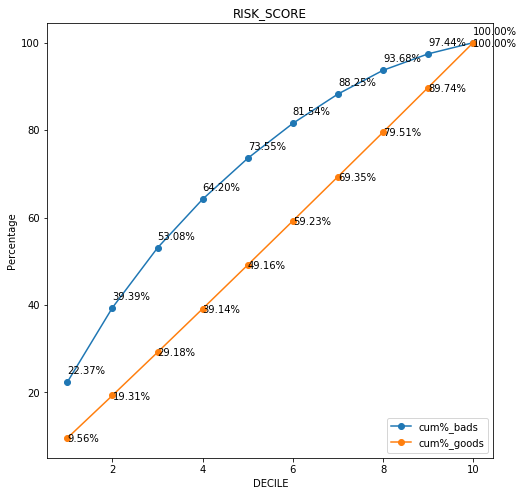

In [16]:
ks_df=ks(data=df,target=TARGET, prob=RISK_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads",marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("RISK_SCORE")
    
ks_df

KS is 11.1% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.512079,0.550464,1776,29190,16.69%,9.76%,16.69%,9.76%,6.9
2,0.497425,0.512079,1345,29621,12.64%,9.91%,29.33%,19.67%,9.7
3,0.480567,0.497425,1184,29782,11.13%,9.96%,40.45%,29.63%,10.8
4,0.475275,0.480567,1090,29876,10.24%,9.99%,50.70%,39.62%,11.1
5,0.473591,0.475275,1001,29964,9.41%,10.02%,60.10%,49.64%,10.5
6,0.472253,0.473591,928,30038,8.72%,10.05%,68.82%,59.69%,9.1
7,0.465913,0.472253,883,30083,8.30%,10.06%,77.12%,69.75%,7.4
8,0.457444,0.465913,884,30082,8.31%,10.06%,85.43%,79.81%,5.6
9,0.454413,0.457444,845,30121,7.94%,10.07%,93.37%,89.88%,3.5


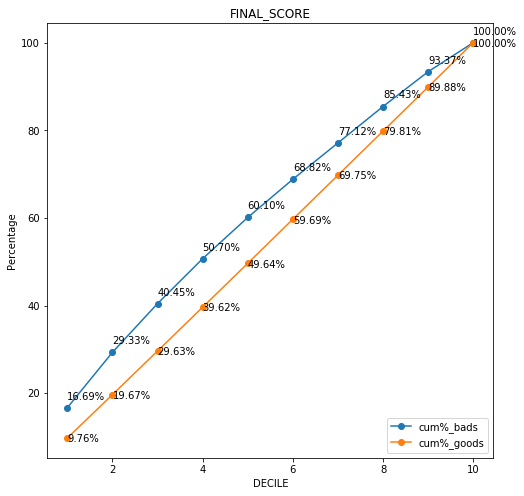

In [17]:
ks_df=ks(data=df,target=TARGET, prob=FINAL_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("FINAL_SCORE")

ks_df

# Log Loss

# Concordant – Discordant ratio

# Precision Recall Curve

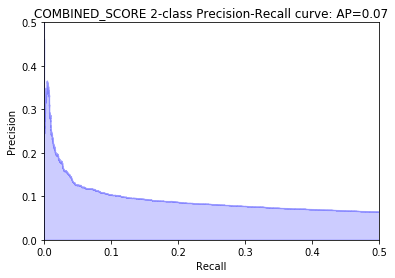

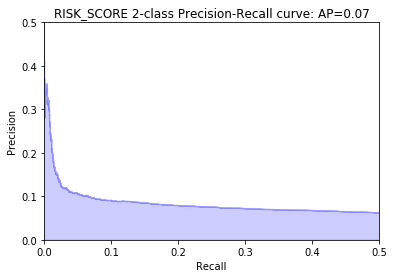

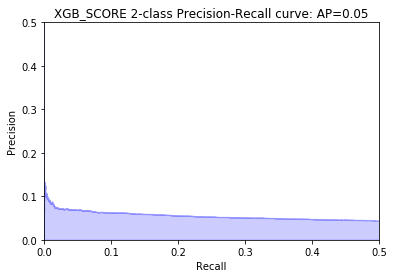

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for x in [COMBINED_SCORE,RISK_SCORE,FINAL_SCORE]:
    precision, recall, _ = precision_recall_curve(df[TARGET],df[x])

    step_kwargs = ({'step': 'post'}
                   #if 'step' in signature(plt.fill_between).parameters
                   #else {}
                  )
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.5])
    plt.xlim([0.0, 0.5])
    plt.title(x+' 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(df[TARGET],df[x])))
    plt.show()
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    #print(x +" AUC for precision-recall :",auc_pr)
    print("\n")
